<a href="https://colab.research.google.com/github/19522224/CS114.L21/blob/master/scoreprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preprocessor Data**

In [73]:
import pandas as pd
import numpy as np


In [74]:
import sqlite3

conn = sqlite3.connect('Driver={SQL Server};'
                      'Server=RON\SQLEXPRESS;'
                      'Database=TestDB;'
                      'Trusted_Connection=yes;')
cur = conn.cursor()

In [75]:

score=pd.read_excel('./score_training.xlsx')
score.head()

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05


In [76]:
score.to_sql('SCORE', conn, if_exists='replace', index=False)
data_score=pd.DataFrame(cur.execute('SELECT id, CK FROM SCORE  GROUP BY id'))


In [77]:
data_score.rename(columns = {list(data_score)[0]:'user_id'}, inplace=True)
data_score.rename(columns = {list(data_score)[1]:'CK'}, inplace=True)
data_score.head(50)

,user_id,CK
0,22,8.5
1,24,9.5
2,27,10
3,28,9.5
4,29,8.5
5,30,9
6,34,6.5
7,35,4.5
8,36,7
9,37,7.5


In [ ]:
wecode=pd.read_excel('./wecode.xlsx')
wecode.head()

In [ ]:
wecode.describe()
wecode.to_sql('WECODE', conn, if_exists='replace', index=False)

In [ ]:

# Fetch and display result
  ## tổng problem của từng người
for row in cur.execute('SELECT user_id, COUNT(DISTINCT problem_id) AS sum_problem FROM wecode GROUP BY user_id'):
    print(row)

In [ ]:
  ##  1 problem thì mỗi sinh viên nộp bao nhiêu bài test
for row in cur.execute('SELECT user_id, SUM(sum_test) FROM (SELECT user_id, assignment_id, problem_id, COUNT(*) AS sum_test FROM wecode GROUP BY user_id, problem_id, assignment_id) GROUP BY user_id'):
    print(row)


In [ ]:
  ## điểm số của những bài test được nộp cuối cùng(những bài test dc lấy điểm chấm cuối cùng)
for row in cur.execute('SELECT user_id, SUM(pre_score) FROM wecode WHERE is_final = 1 GROUP BY user_id'):
    print(row)

In [ ]:
new_data=pd.DataFrame(cur.execute('SELECT user_id FROM wecode GROUP BY user_id'))
new_data.rename(columns = {list(new_data)[0]:'user_id'}, inplace=True)
new_data.head()

In [ ]:
#1 Tổng số problem đã solved (is_final = 1 && pre_score=10000) / Tổng số problem có submit
new_data['prob_solved/prob_submit']=pd.DataFrame(cur.execute('SELECT AVG(sum_problem) FROM (SELECT user_id, is_final, pre_score, COUNT(DISTINCT problem_id) AS sum_problem FROM wecode GROUP BY user_id) WHERE (is_final = 1 AND pre_score=10000) GROUP BY user_id'))
new_data.head()

In [ ]:
 new_data=pd.merge(new_data,data_score,on='user_id',how='left')
 new_data.head(50)

In [ ]:
new_data['CK']=pd.to_numeric(new_data['CK'], errors='coerce')
new_data.head(50)

In [ ]:
new_data.info()

In [ ]:
Is_notNull_data=new_data[pd.notnull(new_data['CK'])]


In [ ]:
### chọn những giá trị có điểm cuối kì
Is_notNull_data.head(50)

In [ ]:
### chọn giá trị không có điểm cuối kì
Is_Null_data=new_data[pd.isnull(new_data['CK'])]

In [ ]:
Is_Null_data.head()

# **Train Model**

## **Import Libraries**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

## **Processing data**

In [ ]:
X=Is_notNull_data.drop(['user_id','CK'],axis=1)
y=Is_notNull_data['CK']

In [ ]:
X.head()

,sum_prob,sum_test,total_score
9,78,164,750299.0
10,5,13,39000.0
11,80,199,762760.0
13,84,218,822888.0
14,147,297,1477000.0


In [ ]:
y.head()

9      9.5
10    10.0
11     8.5
13     6.5
14     4.5
Name: CK, dtype: float64

## **Split training data and test data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


## **Show on graph**

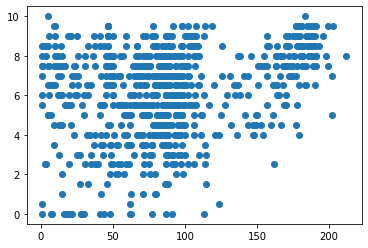

In [68]:
plt.scatter(X['sum_prob'],y)
plt.show()

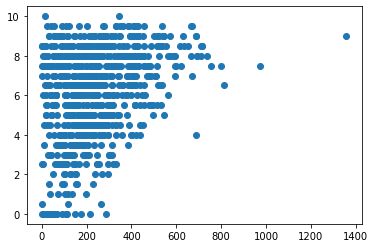

In [69]:
plt.scatter(X['sum_test'],y)
plt.show()

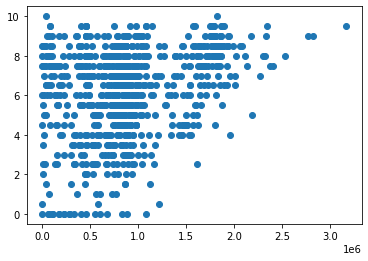

In [70]:
plt.scatter(X['total_score'],y)